In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
def read_log(path):
    rows = []
    for line in open(path).readlines():
        rows.append(json.loads(line.strip()))
    return pd.DataFrame(rows)
        

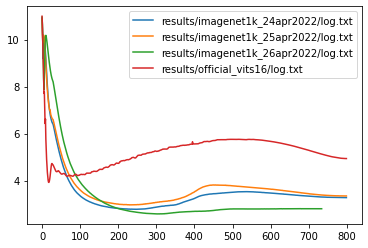

In [9]:
paths = [
    "results/imagenet1k_24apr2022/log.txt",
    "results/imagenet1k_25apr2022/log.txt",
    "results/imagenet1k_26apr2022/log.txt",
    "results/official_vits16/log.txt"
    #"results/laion_13apr2022/log.txt"
]
for path in paths:
    df= read_log(path)
    plt.plot(df.epoch, df.train_loss, label=path)
plt.legend()